Segmentation of an image using K-Means Clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
from email.mime import image
from matplotlib.image import imread

image = imread(r"BG.jpg")
image.shape
# First feature is w, second is l, third is color channels(RGB, A)

X = np.reshape(image, (-1, 3))
# This tells numpy to reshape the array to a suitable number and 3 as the final feature shape.
X.shape

(2073600, 3)

In [3]:
from sklearn.cluster import KMeans

KMeansClusterer = KMeans(n_clusters=2)
KMeansClusterer.fit(X=X)

KMeans(n_clusters=2)

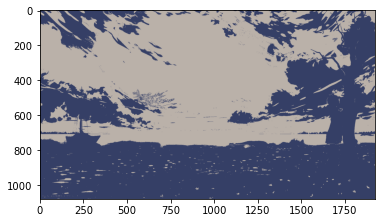

In [4]:
# Basically reconstructs the image by choosing cluster centers corresponding to the labels of all the segmented img data.
SegmentedImg = KMeansClusterer.cluster_centers_[KMeansClusterer.labels_]
SegmentedImg = SegmentedImg.reshape(image.shape)
plt.imshow(X=SegmentedImg.astype("uint8")) # As uint8 to avoid issues.

In [5]:
from multiprocessing.spawn import import_main_path
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)

xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logRegClf = LogisticRegression()
logRegClf.fit(xTrain,yTrain)
yPreds = logRegClf.predict(xTest)
print(accuracy_score(yTest,yPreds))

0.9611111111111111


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Finding appropriate no. of clusters.
from sklearn.metrics import silhouette_score

def kMeansTrainer(nFeaturesMax, xSet):
    silhouletteScores = []
    for i in range(nFeaturesMax):
        kMeans = KMeans(n_clusters=i+2)
        kMeans.fit(xSet)
        silhouletteScores = silhouletteScores + [silhouette_score(xSet, kMeans.labels_)]
    return silhouletteScores

#silhouletteArr = kMeansTrainer(100, xTrain)

In [8]:
#plt.plot(silhouletteArr, "-")
plt.show()
# ~58 is a good local minimum.

In [9]:
kMeans = KMeans(n_clusters=58)

#  transform method returns L2 distance of instances from clusters.
xTrainDist = kMeans.fit_transform(xTrain) 
xTestDist = kMeans.transform(xTest)

logReg = LogisticRegression()
logReg.fit(xTrainDist, yTrain)
yPred = logReg.predict(xTestDist)
print(accuracy_score(yTest,yPred))

0.9694444444444444


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
